<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/gambler_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Gambler's problem__

This problem is 
[ex 4.3](https://github.com/songqsh/foo1/blob/master/doc/gambler_problem.pdf) 
of the book 
[SB18](http://incompleteideas.net/book/the-book-2nd.html). 


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.4

In [0]:
# state value
state_value = np.zeros(GOAL + 1)
state_value[GOAL] = 1.0

# policy value
policy = np.zeros(GOAL + 1)

# value iteration
while True:
    delta = 0.0
    for state in STATES[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        new_value = np.max(action_returns)
        
        delta += np.abs(state_value[state] - new_value)
        # update state value
        state_value[state] = new_value
        # update policy
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]
        
    if delta < 1e-9:
        break

Text(0, 0.5, 'Value estimates')

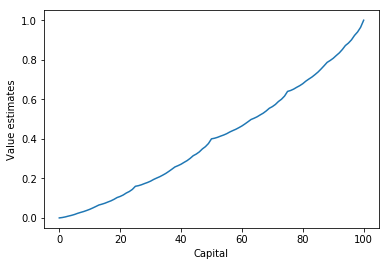

In [4]:
plt.plot(state_value)
plt.xlabel('Capital')
plt.ylabel('Value estimates')


Text(0, 0.5, 'Final policy (stake)')

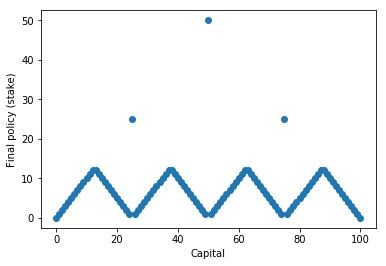

In [5]:
plt.scatter(STATES, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

__Q__

What is the asymptotic behavior?